In [3]:
!pip install python-binance pandas numpy plotly nbformat ipykernel scikit-learn seaborn matplotlib
import pandas as pd
import numpy as np
from binance.client import Client
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

DEPRECATION: Loading egg at /Users/jcamilovasquezm/visualStudioProjects/TWS_IBKR_Trading/venv/lib/python3.11/site-packages/ibapi-10.34.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# In your notebook cell
from app_df import PTLClient, get_historical_dataframe, DEFAULT_HOST, PAPER_TRADING_PORT, DEFAULT_CLIENT_ID

# Create an instance of your client
client = PTLClient(DEFAULT_HOST, PAPER_TRADING_PORT, DEFAULT_CLIENT_ID)

# Now request historical data (for example, EUR USD data) and get it as a DataFrame.
# Adjust the parameters as needed (symbol, timeframe, etc.)
df_whole = get_historical_dataframe(client, "EUR", "4 hours", "20250217 12:00:00 US/Eastern", "1 Y")
print(df_whole.head())

ERROR -1 1739916767418 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 1739916767418 2104 Market data farm connection is OK:cashfarm
ERROR -1 1739916767418 2104 Market data farm connection is OK:usopt
ERROR -1 1739916767418 2104 Market data farm connection is OK:eufarmnj
ERROR -1 1739916767418 2104 Market data farm connection is OK:usfarm
ERROR -1 1739916767418 2106 HMDS data farm connection is OK:cashhmds
ERROR -1 1739916767418 2106 HMDS data farm connection is OK:ushmds
ERROR -1 1739916767418 2158 Sec-def data farm connection is OK:secdefil


next valid id is 1
getting bar data for EUR 4 hours
end of data 20240217 12:00:00 US/Eastern 20250217 12:00:00 US/Eastern
                              Open     High      Low    Close  Volume
Datetime                                                             
2024-02-18 17:15:00-05:00  1.07710  1.07850  1.07669  1.07839      -1
2024-02-18 19:00:00-05:00  1.07839  1.07889  1.07750  1.07755      -1
2024-02-18 23:00:00-05:00  1.07755  1.07894  1.07748  1.07825      -1
2024-02-19 03:00:00-05:00  1.07825  1.07874  1.07722  1.07770      -1
2024-02-19 07:00:00-05:00  1.07770  1.07795  1.07620  1.07674      -1


In [4]:
df_whole.shape

(1810, 5)

In [5]:
split_time = pd.Timestamp('2025-01-01 12:00:00', tz='US/Eastern')

# Slice the DataFrame into two based on the index
df = df_whole.loc[df_whole.index < split_time]
df_test  = df_whole.loc[df_whole.index >= split_time]

# Verify
print("Before split:")
print(df.head())
print("\nAfter split:")
print(df_test.head())

Before split:
                              Open     High      Low    Close  Volume
Datetime                                                             
2024-02-18 17:15:00-05:00  1.07710  1.07850  1.07669  1.07839      -1
2024-02-18 19:00:00-05:00  1.07839  1.07889  1.07750  1.07755      -1
2024-02-18 23:00:00-05:00  1.07755  1.07894  1.07748  1.07825      -1
2024-02-19 03:00:00-05:00  1.07825  1.07874  1.07722  1.07770      -1
2024-02-19 07:00:00-05:00  1.07770  1.07795  1.07620  1.07674      -1

After split:
                              Open     High      Low    Close  Volume
Datetime                                                             
2025-01-01 19:00:00-05:00  1.03506  1.03741  1.03441  1.03716      -1
2025-01-01 23:00:00-05:00  1.03716  1.03758  1.03600  1.03628      -1
2025-01-02 03:00:00-05:00  1.03628  1.03710  1.03136  1.03321      -1
2025-01-02 07:00:00-05:00  1.03321  1.03345  1.02724  1.02741      -1
2025-01-02 11:00:00-05:00  1.02741  1.02762  1.02234  1.02511 

In [6]:
def add_ema(df, periods=[20, 50, 100, 200]):
  """
    Add Exponential Moving Averages (EMAs) to the DataFrame.
    : param df: DataFrame with price data : param periods: List of periods for EMAs return: DataFrame with added EMA columns
  """
  for period in periods:
      df[f'EMA_{period}'] = df['Close'].ewm(span=period, adjust=False).mean()
  return df

In [7]:
df = add_ema(df)
df.head()

/var/folders/b9/n8g7w60s6s50jwpyrnbrw1m80000gn/T/ipykernel_58644/3434171293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'EMA_{period}'] = df['Close'].ewm(span=period, adjust=False).mean()
/var/folders/b9/n8g7w60s6s50jwpyrnbrw1m80000gn/T/ipykernel_58644/3434171293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'EMA_{period}'] = df['Close'].ewm(span=period, adjust=False).mean()
/var/folders/b9/n8g7w60s6s50jwpyrnbrw1m80000gn/T/ipykernel_58644/3434171293.py:7: SettingWithCopyWarning: 
A val

,Open,High,Low,Close,Volume,EMA_20,EMA_50,EMA_100,EMA_200
Datetime,,,,,,,,,
2024-02-18 17:15:00-05:00,1.07710,1.07850,1.07669,1.07839,-1,1.078390,1.078390,1.078390,1.078390
2024-02-18 19:00:00-05:00,1.07839,1.07889,1.07750,1.07755,-1,1.078310,1.078357,1.078373,1.078382
2024-02-18 23:00:00-05:00,1.07755,1.07894,1.07748,1.07825,-1,1.078304,1.078353,1.078371,1.078380
2024-02-19 03:00:00-05:00,1.07825,1.07874,1.07722,1.07770,-1,1.078247,1.078327,1.078358,1.078374
2024-02-19 07:00:00-05:00,1.07770,1.07795,1.07620,1.07674,-1,1.078103,1.078265,1.078326,1.078357


In [8]:
def plot_data_with_ema(df):
  """
  Create an interactive Plotly plot with candlestick data and EMAs.
  : param df: DataFrame with price and EMA data
  """
  fig = go.Figure()

  # Add candlestick chart
  fig.add_trace(go.Candlestick(
      x=df.index,
      open=df[ 'Open'],
      high=df['High'],
      low=df['Low'],
      close=df[ 'Close'],
      name= 'Candlesticks'
  ))

  # Add EMAs
  for ema_period in [20, 50, 100, 200]:
    fig.add_trace(go.Scatter(
      x=df. index,
      y=df [f'EMA_{ema_period}'],
      mode='lines',
      name=f'EMA {ema_period}'
    ))

  # Customize Layout
  fig.update_layout(
    title="Candlestick Chart with EMAs",
    xaxis_title="Time",
    yaxis_title="Price",
    xaxis_rangeslider_visible=False
  )

  fig.show()

In [9]:
plot_data_with_ema(df)

In [11]:
# Define function to prepare data
def prepare_data(data, sma_window=14, rsi_window=14):
    # Calculate technical indicators
    data['Returns'] = data['Close'].pct_change()
    data['SMA'] = data['Close'].rolling(window=sma_window).mean()
    data['Std'] = data['Close'].rolling(window=sma_window).std()
    # Candle_Binary marks as 0 red candles and 1 green ones
    data['Candle_Binary'] = (data['Returns'] > 0).astype(int)
    data['Momentum'] = data['Close'] - data['Close'].shift(5)
    data['Volatility'] = data['Returns'].rolling(window=5).std()
    data['ma5'] = data['Close'].rolling(window=5).mean()
    data['ma10'] = data['Close'].rolling(window=10).mean()


    # RSI calculation
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=rsi_window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=rsi_window).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))

    # 3) Bar UpDown
    """
      data['Up_Bar'] = (
        (data['High'] > data['High'].shift(1)) & 
        (data['Low']  > data['Low'].shift(1))
    )
    data['Down_Bar'] = (
        (data['High'] < data['High'].shift(1)) & 
        (data['Low']  < data['Low'].shift(1))
    )
    """
  

    # Bar UpDown
    data['Up_Bar'] = (data['Close'] > data['Open']) & (data['Open'] > data['Close'].shift(1))
    data['Down_Bar'] = (data['Close'] < data['Open']) & (data['Open'] < data['Close'].shift(1))
    #df['Up_Bar'] = df['Up_Bar'].astype(int)
    #df['Down_Bar'] = df['Down_Bar'].astype(int)

    # Create features

    # Entire candle + SMA 
    features = ['Returns', 'Volatility', 'ma5', 'ma10', 'Momentum', 'Close', 'High', 'Low', 'Open']

    # Bar UpDown only
    #features = ['Up_Bar']

    # Bar UpDown + RSI
    #features = ['Down_Bar', 'EMA_20', 'EMA_50', 'EMA_100', 'EMA_200', 'RSI']

    # features = ['SMA', 'Std', 'RSI', 'RSI']
    X = data[features].shift(1)  # Shift by 1 to avoid look-ahead bias

    # Create binary target: 1 if price goes up, 0 if it goes down
    y = data['Candle_Binary']

    # Pips per candle
    data['pips'] = data['Returns'] * 10000

    # Remove NaN values
    X = X.dropna()
    y = y[X.index]

    return X, y

In [12]:
# Prepare de data and split on X = Features and y = Target
X, y = prepare_data(df, sma_window=14)

/var/folders/b9/n8g7w60s6s50jwpyrnbrw1m80000gn/T/ipykernel_58644/1740594674.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b9/n8g7w60s6s50jwpyrnbrw1m80000gn/T/ipykernel_58644/1740594674.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b9/n8g7w60s6s50jwpyrnbrw1m80000gn/T/ipykernel_58644/1740594674.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
# Verify best number of trees
n_trees = range(20, 500, 20)
print(n_trees)
scores = []

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

plt.plot(n_trees, scores)
plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validation Score')
plt.title('Random Forest Performance vs Number of Trees')
plt.show()

optimal_trees = n_trees[np.argmax(scores)]
print(f"Optimal number of trees: {optimal_trees}")

range(20, 500, 20)


KeyboardInterrupt: 

In [14]:
# Train the model
# Random Forest with 10 trees
rf_model = RandomForestClassifier(n_estimators=80, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80, random_state=42)

In [15]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("\nMean Squared Error Report:")
print(mean_squared_error(y_test,y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Model Accuracy: 0.53

Mean Squared Error Report:
0.4666666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.46      0.49       155
           1       0.54      0.60      0.57       160

    accuracy                           0.53       315
   macro avg       0.53      0.53      0.53       315
weighted avg       0.53      0.53      0.53       315


Confusion Matrix:
[[72 83]
 [64 96]]


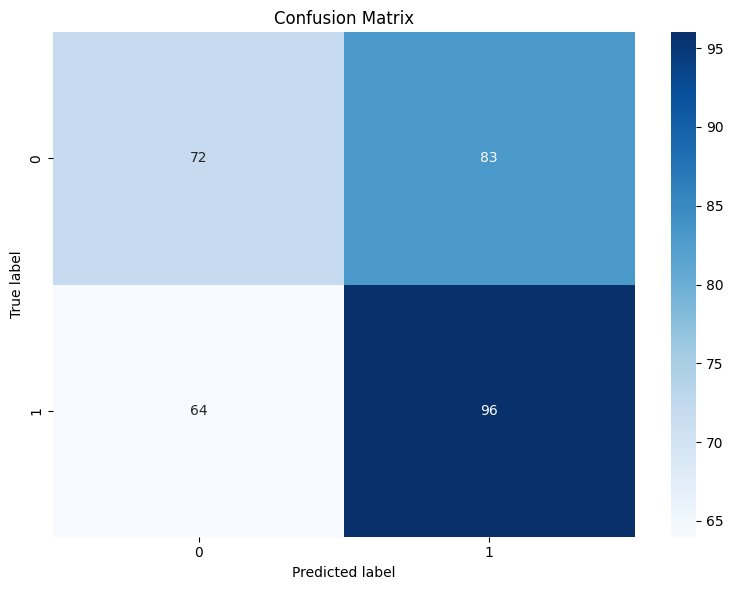

In [16]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [17]:
feature_columns = X.columns.copy()
#feature_columns = feature_columns.get_level_values('Price').tolist()

In [18]:
# Visualize feature importance

feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=True)  # Sort ascending for better visualization
feature_importance

,feature,importance
5,Close,0.091991
8,Open,0.096185
7,Low,0.098336
6,High,0.099712
2,ma5,0.104337
3,ma10,0.106366
1,Volatility,0.129569
4,Momentum,0.131305
0,Returns,0.142200


# Model in Action

With the trained model, now let's test with the df_test dataframe.

In [19]:
# -------------------------------
# 5. Define Pattern Recognition Functions
# -------------------------------
def is_bullish_engulfing(prev, curr):
    """
    Bullish Engulfing:
      - Previous candle is bearish (Close < Open)
      - Current candle is bullish (Close > Open)
      - Current candle's body engulfs the previous candle's body
    """
    if (prev['Close'] < prev['Open']) and (curr['Close'] > curr['Open']):
        if (curr['Open'] < prev['Close']) and (curr['Close'] > prev['Open']):
            return True
    return False

def is_bearish_engulfing(prev, curr):
    """
    Bearish Engulfing:
      - Previous candle is bullish (Close > Open)
      - Current candle is bearish (Close < Open)
      - Current candle's body engulfs the previous candle's body
    """
    if (prev['Close'] > prev['Open']) and (curr['Close'] < curr['Open']):
        if (curr['Open'] > prev['Close']) and (curr['Close'] < prev['Open']):
            return True
    return False

In [20]:
# Bar UpDown

def is_bullish_bar(prev, curr):
    """
    Bullish Bar:
        - Previous candle is bearish (Close < Open)
        - Current candle is bullish (Close > Open)
        """
    if (prev['Close'] < prev['Open']) and (curr['Close'] > curr['Open']):
        return True


def is_bearish_bar(prev, curr):
    """
    Bearish Bar:
        - Previous candle is bullish (Close > Open)
        - Current candle is bearish (Close < Open)
        """
    if (prev['Close'] > prev['Open']) and (curr['Close'] < curr['Open']):
        return True

In [21]:
df_test.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2025-01-01 19:00:00-05:00,1.03506,1.03741,1.03441,1.03716,-1
2025-01-01 23:00:00-05:00,1.03716,1.03758,1.03600,1.03628,-1
2025-01-02 03:00:00-05:00,1.03628,1.03710,1.03136,1.03321,-1
2025-01-02 07:00:00-05:00,1.03321,1.03345,1.02724,1.02741,-1
2025-01-02 11:00:00-05:00,1.02741,1.02762,1.02234,1.02511,-1


In [22]:
X, y = prepare_data(df_test, sma_window=14)
df_test

/var/folders/b9/n8g7w60s6s50jwpyrnbrw1m80000gn/T/ipykernel_58644/1740594674.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b9/n8g7w60s6s50jwpyrnbrw1m80000gn/T/ipykernel_58644/1740594674.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b9/n8g7w60s6s50jwpyrnbrw1m80000gn/T/ipykernel_58644/1740594674.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,Open,High,Low,Close,Volume,Returns,SMA,Std,Candle_Binary,Momentum,Volatility,ma5,ma10,RSI,Up_Bar,Down_Bar,pips
Datetime,,,,,,,,,,,,,,,,,
2025-01-01 19:00:00-05:00,1.03506,1.03741,1.03441,1.03716,-1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,False,False,NaN
2025-01-01 23:00:00-05:00,1.03716,1.03758,1.03600,1.03628,-1,-0.000848,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,False,False,-8.484708
2025-01-02 03:00:00-05:00,1.03628,1.03710,1.03136,1.03321,-1,-0.002963,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,False,False,-29.625198
2025-01-02 07:00:00-05:00,1.03321,1.03345,1.02724,1.02741,-1,-0.005614,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,False,False,-56.135732
2025-01-02 11:00:00-05:00,1.02741,1.02762,1.02234,1.02511,-1,-0.002239,NaN,NaN,0,NaN,NaN,1.031834,NaN,NaN,False,False,-22.386389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-16 19:00:00-05:00,1.04886,1.05064,1.04855,1.04946,-1,0.000572,1.046391,0.003070,1,0.00272,0.001998,1.049588,1.047958,72.140762,False,False,5.720497
2025-02-16 23:00:00-05:00,1.04946,1.04982,1.04804,1.04826,-1,-0.001143,1.046799,0.002895,0,-0.00258,0.000722,1.049072,1.048145,66.193182,False,False,-11.434452
2025-02-17 03:00:00-05:00,1.04826,1.04893,1.04709,1.04818,-1,-0.000076,1.047361,0.002223,0,-0.00167,0.000690,1.048738,1.048347,75.551232,False,False,-0.763169


In [24]:
# -------------------------------
# 6. Simulate Trading Starting January 2, 2025
# -------------------------------
# We simulate by iterating over the test set (daily candles)
# At the start of each day we use the previous day's features to predict today's move.
# Trading assumptions:
# - If signal is bullish (1), take a long position: profit = (Close - Open)
# - If signal is bearish (0), take a short position: profit = (Open - Close)
# - Capital update per trade is computed on a notional unit basis.
capital = 10000.0  # starting capital in USD
trades = []
l_trades_quantity = 0
s_trades_quantity = 0
features_to_predict = ['Returns', 'Volatility', 'ma5', 'ma10', 'Momentum', 'Close', 'High', 'Low', 'Open']
# Micro lot size: 1 pip = $0.10  (trade volume = 0.1)
# Mini lot size: 1 pip = $1.00 (trade volume = 1)
# Standard lot size: 1 pip = $10.00 (trade volume = 10)
trade_volume = 10
spread = 1.2

def calculate_profit(pips):
    return ((pips - spread) * trade_volume)

# Iterate from the second day of the test period onward so we have a "previous" candle.
for i in range(1, len(df_test)):
    today = df_test.iloc[i]
    yesterday = df_test.iloc[i-1]
    day_before_yesterday = df_test.iloc[i-2]
    
    # Use yesterday's features to predict today's outcome (model was trained to predict next candle's direction)
    model_signal = rf_model.predict([yesterday[features_to_predict].values])[0]
    
    # Apply pattern strategy: if a clear bullish or bearish engulfing pattern is detected,
    # use that signal to override the model prediction.
    pattern_signal = 2
    if is_bullish_bar(day_before_yesterday, yesterday):
        pattern_signal = 1
    elif is_bearish_bar(day_before_yesterday, yesterday):
        pattern_signal = 0
    
    # Final signal: pattern confirmation takes precedence if available.
    signal = 2
    #signal = pattern_signal if pattern_signal is not None else model_signal
    signal = model_signal

    # Final signal Matching both predicted and pattern:
    #if (pattern_signal == model_signal):
    #    signal = pattern_signal
    
    profit = 0.0  # Initialize profit to 0.0 if no trade is made.
    # Simulate trade: enter at the Open and exit at the Close of the day.
    if signal == 1:
        pseudo_pips = today['Close'] - today['Open']
        pips = (pseudo_pips * 10000) 
        profit = calculate_profit(pips)
        l_trades_quantity += 1

    if signal == 0:
        pseudo_pips = today['Open'] - today['Close']
        pips = (pseudo_pips * 10000)
        profit = calculate_profit(pips)
        s_trades_quantity += 1
    
    capital += profit  # Update capital (note: this is a simplified model, not accounting for leverage or trade sizing)
    trades.append({
        'date': today.name,
        'ms': model_signal,
        'ps': pattern_signal,
        's': signal,
        'Open': today['Open'],
        'Close': today['Close'],
        'profit': profit,
        'capital': capital
    })

# Convert trading simulation results to a DataFrame and output results
trades_df = pd.DataFrame(trades)
print("\nTrading Simulation Results:")
print(trades_df.head(30))
print(f"\nLong Trades Quantity: {l_trades_quantity}, " + "\nShort Trades Quantity: ", s_trades_quantity)
print("\nFinal Capital: $", round(capital, 2))

/Users/jcamilovasquezm/visualStudioProjects/TWS_IBKR_Trading/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/Users/jcamilovasquezm/visualStudioProjects/TWS_IBKR_Trading/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/Users/jcamilovasquezm/visualStudioProjects/TWS_IBKR_Trading/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/Users/jcamilovasquezm/visualStudioProjects/TWS_IBKR_Trading/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/Users/jcamilovasquezm/visualStudioProjects/TWS_


Trading Simulation Results:
                        date  ms  ps  s     Open    Close  profit  capital
0  2025-01-01 23:00:00-05:00   1   1  1  1.03716  1.03628  -100.0   9900.0
1  2025-01-02 03:00:00-05:00   1   0  1  1.03628  1.03321  -319.0   9581.0
2  2025-01-02 07:00:00-05:00   1   2  1  1.03321  1.02741  -592.0   8989.0
3  2025-01-02 11:00:00-05:00   1   2  1  1.02741  1.02511  -242.0   8747.0
4  2025-01-02 15:00:00-05:00   1   2  1  1.02511  1.02658   135.0   8882.0
5  2025-01-02 17:15:00-05:00   1   1  1  1.02600  1.02678    66.0   8948.0
6  2025-01-02 19:00:00-05:00   1   2  1  1.02678  1.02707    17.0   8965.0
7  2025-01-02 23:00:00-05:00   1   2  1  1.02707  1.02808    89.0   9054.0
8  2025-01-03 03:00:00-05:00   1   2  1  1.02808  1.02973   153.0   9207.0
9  2025-01-03 07:00:00-05:00   1   2  1  1.02973  1.02892   -93.0   9114.0
10 2025-01-03 11:00:00-05:00   1   0  1  1.02892  1.03012   108.0   9222.0
11 2025-01-03 15:00:00-05:00   1   1  1  1.03012  1.03071    47.0   926

/Users/jcamilovasquezm/visualStudioProjects/TWS_IBKR_Trading/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/Users/jcamilovasquezm/visualStudioProjects/TWS_IBKR_Trading/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/Users/jcamilovasquezm/visualStudioProjects/TWS_IBKR_Trading/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/Users/jcamilovasquezm/visualStudioProjects/TWS_IBKR_Trading/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/Users/jcamilovasquezm/visualStudioProjects/TWS_

In [26]:
# Calculate additional metrics

# 1. Cumulative Maximum Capital: running max of the 'capital' column
trades_df['cum_max'] = trades_df['capital'].cummax()

# 2. Drawdown (in dollars) = current capital minus running maximum capital
trades_df['drawdown'] = trades_df['capital'] - trades_df['cum_max']

# 3. Drawdown Percentage
trades_df['drawdown_pct'] = (trades_df['drawdown'] / trades_df['cum_max']) * 100

# 4. Profit Factor:
# Sum up profits from winning trades and absolute losses from losing trades.
total_profit = trades_df.loc[trades_df['profit'] > 0, 'profit'].sum()
total_loss = abs(trades_df.loc[trades_df['profit'] < 0, 'profit'].sum())
profit_factor = total_profit / total_loss if total_loss != 0 else float('inf')

# Print calculated metrics
print("Total Profit: ${:.2f}".format(total_profit))
print("Total Loss: ${:.2f}".format(total_loss))
print("Profit Factor: {:.2f}".format(profit_factor))
print("Maximum Drawdown: ${:.2f}".format(abs(trades_df['drawdown'].min())))
print("Maximum Drawdown (%): {:.2f}%".format(abs(trades_df['drawdown_pct'].min())))



Total Profit: $15333.00
Total Loss: $14481.00
Profit Factor: 1.06
Maximum Drawdown: $2843.00
Maximum Drawdown (%): 27.18%


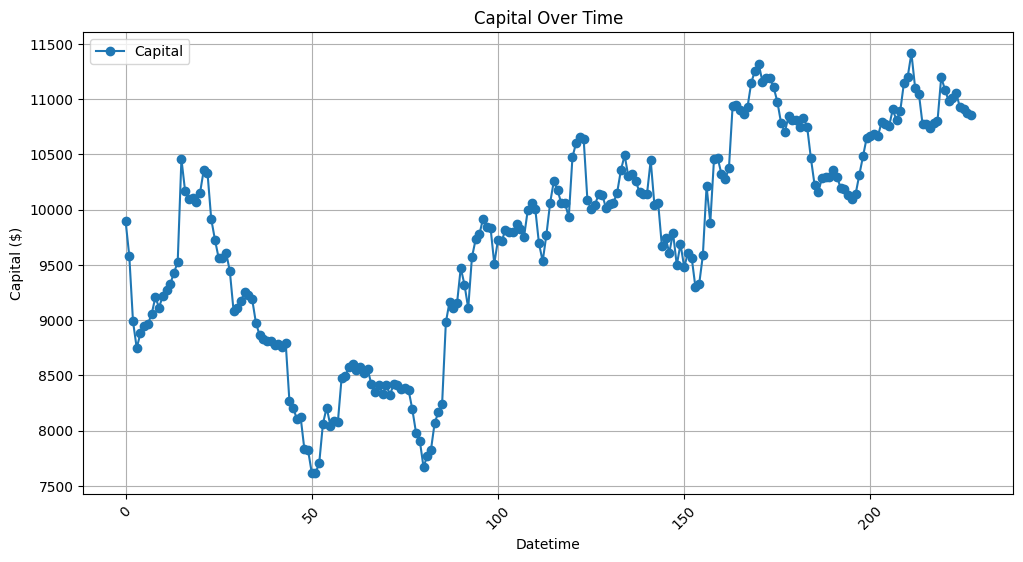

In [27]:
# Plotting the Capital Over Time
plt.figure(figsize=(12, 6))
plt.plot(trades_df.index, trades_df['capital'], marker='o', linestyle='-', label='Capital')
plt.title('Capital Over Time')
plt.xlabel('Datetime')
plt.ylabel('Capital ($)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

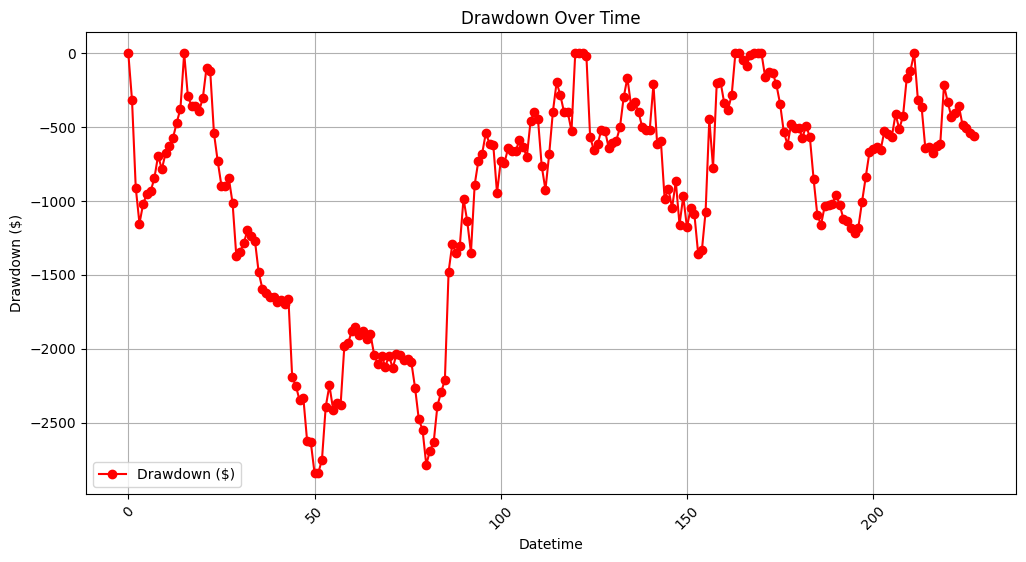

In [28]:
# Plotting the Drawdown Over Time
plt.figure(figsize=(12, 6))
plt.plot(trades_df.index, trades_df['drawdown'], marker='o', linestyle='-', color='red', label='Drawdown ($)')
plt.title('Drawdown Over Time')
plt.xlabel('Datetime')
plt.ylabel('Drawdown ($)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()